# Représenter l'évolution et les types de dépôts dans HAL du portail HAL-ENS sur une année en particulier

Import de bibliothèque

In [60]:
import pandas as pd, json, requests

Définition des fonctions

In [61]:
def req_tot_month(year, month, subtype) :
    req = requests.get(f"https://api.archives-ouvertes.fr/search/ens/?q=submittedDate_s:{year}-{month}-*&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [62]:
def req_total(year, month, st) :
    """nombre de publication pour telle année"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/ens/?q=submittedDate_s:{year}-{month}-*&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Détermination de la période

In [83]:
year = int (input("Année de consultation : "))
mois = ["01","02","03","04","05","06","07","08","09","10","11","12"]

Année de consultation : 2015


Pour traduire

In [84]:
moisstrg = {"01":"janvier","02":"février","03":"mars","04":"avril","05":"mai","06":"juin","07":'juillet',"08":'août',"09":"septembre","10":'octobre',"11":"novembre","12":"décembre"}
typedoc = {"file":"fichiers","notice":"notices","annex":"annexes"}

Calculs des statistiques

In [71]:
totaux = {}
subtypes = ["total"]
for month in mois :
    totaux[month] = {}
    for st in subtypes :
        tot = req_total(year, month, st)
        totaux[month][st] = tot
totaux=dict([(moisstrg.get(key), value) for key, value in totaux.items()])

In [88]:
data = {}
subtypes = ["file", "notice", "annex"]
for month in mois :
    data[month] = {}
    for st in subtypes : 
        num = req_tot_month(year, month, st)
        data[month][st] = num
data=dict([(moisstrg.get(key), value) for key, value in data.items()])

{'01': {'file': 145, 'notice': 235, 'annex': 1},
 '02': {'file': 146, 'notice': 119, 'annex': 0},
 '03': {'file': 115, 'notice': 115, 'annex': 1},
 '04': {'file': 65, 'notice': 213, 'annex': 1},
 '05': {'file': 64, 'notice': 61, 'annex': 1},
 '06': {'file': 75, 'notice': 42, 'annex': 1},
 '07': {'file': 41, 'notice': 99, 'annex': 0},
 '08': {'file': 34, 'notice': 28, 'annex': 0},
 '09': {'file': 81, 'notice': 121, 'annex': 1},
 '10': {'file': 53, 'notice': 60, 'annex': 1},
 '11': {'file': 91, 'notice': 100, 'annex': 1},
 '12': {'file': 167, 'notice': 113, 'annex': 3}}

Transformation en tableau et graphes

In [78]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin

,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
file,193,98,129,117,131,126,133,66,126,201,254,225
notice,284,149,156,232,210,237,274,256,220,405,526,564
annex,1,1,0,2,2,0,0,1,1,3,13,4
total,478,248,285,351,343,363,407,323,347,609,793,793


<AxesSubplot:>

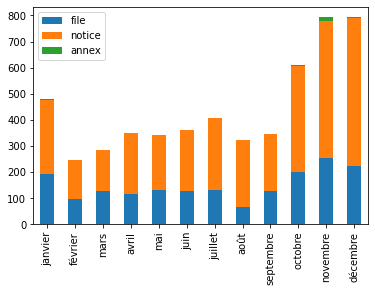

In [82]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)